<a href="https://colab.research.google.com/github/Andrei198203/new3_2-final-project/blob/main/new3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Tensorflow

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [10]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
# Создание модели
model = Sequential(name='cifar10')

In [12]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [13]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

In [22]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

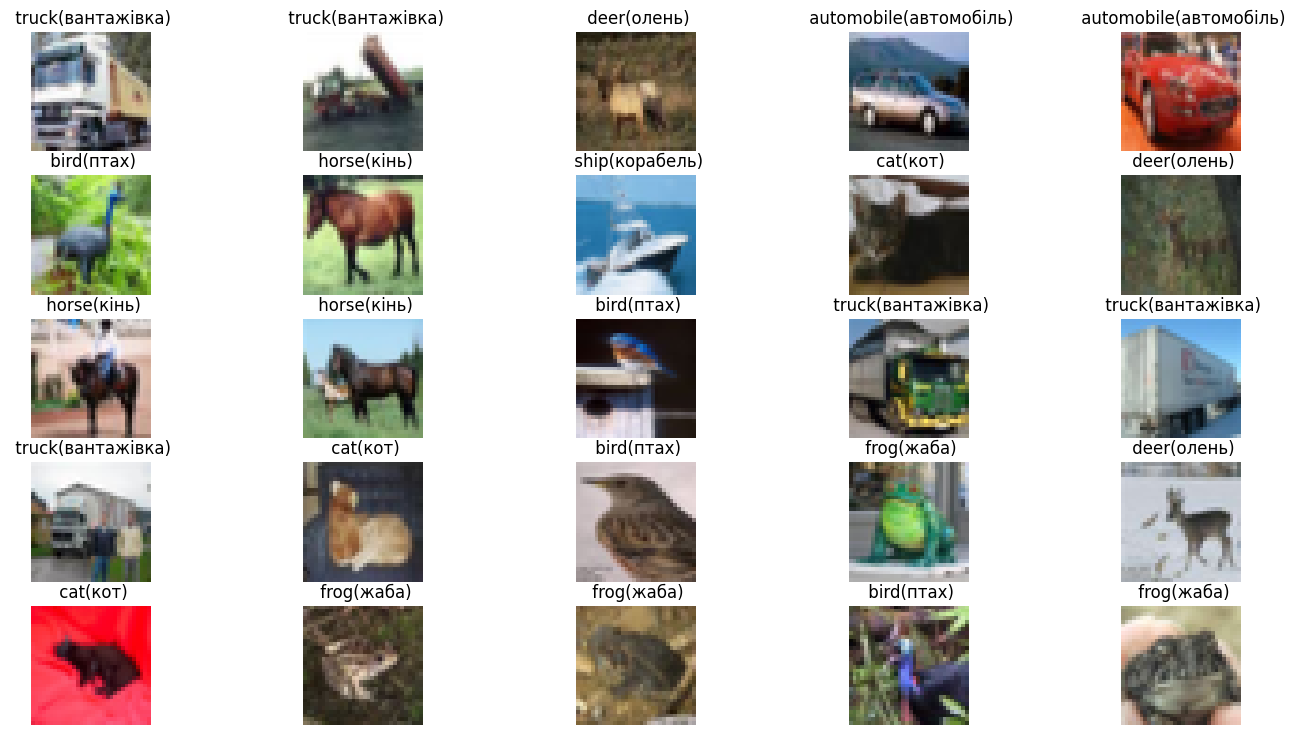

In [14]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [16]:
# Слой 2D-свертки
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
# Компиляция модели
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'],
    run_eagerly=True
)

In [23]:
# Обучение модели
history = model.fit(
    x_train, y_train,
    batch_size=256,
    steps_per_epoch=len(x_train) // 256,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
195/195 [==============================] - 622s 3s/step - loss: 1.8914 - accuracy: 0.3889 - val_loss: 1.9147 - val_accuracy: 0.3593
Epoch 2/20
195/195 [==============================] - 591s 3s/step - loss: 1.1900 - accuracy: 0.5900 - val_loss: 1.4077 - val_accuracy: 0.5690
Epoch 3/20
195/195 [==============================] - 600s 3s/step - loss: 0.9193 - accuracy: 0.6812 - val_loss: 0.8483 - val_accuracy: 0.7177
Epoch 4/20
195/195 [==============================] - 613s 3s/step - loss: 0.7433 - accuracy: 0.7409 - val_loss: 0.9287 - val_accuracy: 0.7021
Epoch 5/20
195/195 [==============================] - 610s 3s/step - loss: 0.6258 - accuracy: 0.7849 - val_loss: 0.9104 - val_accuracy: 0.7038
Epoch 6/20
195/195 [==============================] - 601s 3s/step - loss: 0.5331 - accuracy: 0.8191 - val_loss: 0.7747 - val_accuracy: 0.7537
Epoch 7/20
195/195 [==============================] - 580s 3s/step - loss: 0.4689 - accuracy: 0.8393 - val_loss: 0.8578 - val_accuracy: 0.7446

In [24]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Percentage of test data accuracy: ", round(result_test[1] * 100, 2))
print("Percentage of training data accuracy: ", round(result_train[1] * 100, 2))

1563/1563 [==============================] - 208s 133ms/step - loss: 0.0950 - accuracy: 0.9679
Percentage of test data accuracy:  78.84
Percentage of training data accuracy:  96.79


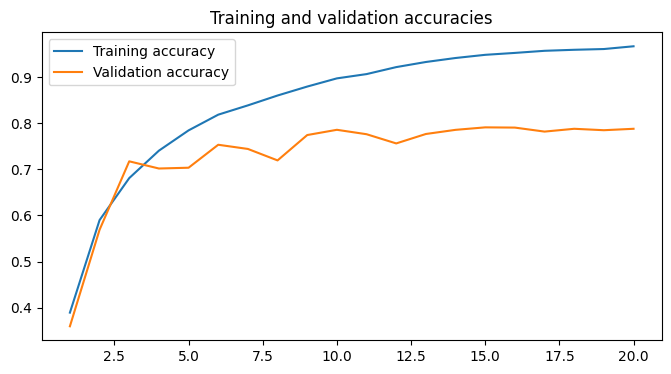

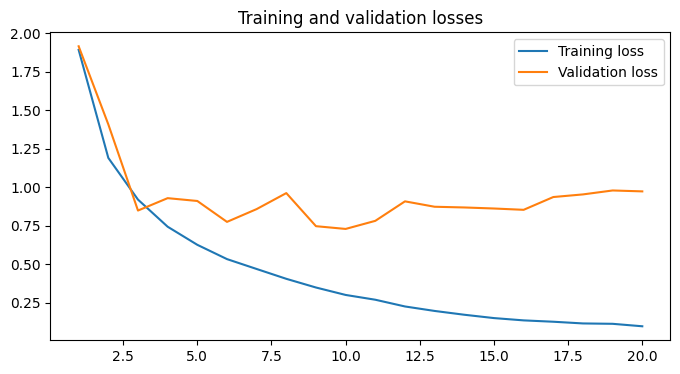

In [25]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [ ]:
# model.save("basesd_model_new.hdf5")

In [26]:
model.save("basesd_model_new13_03_23_00.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import numpy as np

In [ ]:
# model = models.load_model("basesd_model_new.h5")

1/1 [==============================] - 0s 69ms/step
Клас номер: 7
Клас img : horse(кінь)


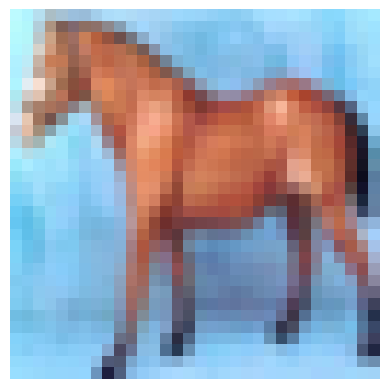

In [29]:
imege_number = 1170

x = np.expand_dims(x_test[imege_number], axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])

# classes[y_train[imege_number][0]]
plt.axis('off')

plt.imshow(x_test[imege_number] ,  cmap=plt.cm.binary)

print(f"Клас номер: {prediction}")
print(f"Клас img : {classes[prediction]}")